<a href="https://colab.research.google.com/github/tuanky/DS-Unit-2-Build/blob/master/Tuan_Ky_Build_Week_2_project_applied_modeling__Vehicles_Collision_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
print( sys.exec_prefix.split(os.sep)[-1] )
import pandas as pd
import numpy as np
import dask.dataframe as dd
!pip install psutil requests


Unit 2


In [0]:


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    start_mem_gb = start_mem / 1024
    print(f'Memory usage of dataframe is {start_mem:.2f} MB',
          f'/ {start_mem_gb:.2f} GB')
    
    for col in df:
        col_type = str(df[col].dtypes)
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    end_mem_gb = end_mem / 1024
    print(f'Memory usage after optimization is: {end_mem:.2f} MB',
          f'/ {end_mem_gb:.2f} GB')
    mem_dec = 100 * (start_mem - end_mem) / start_mem
    print(f'Decreased by {mem_dec:.1f}%')
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""

    dtypes = {
        'AVProductStatesIdentifier': 'float64',
        'AVProductsEnabled': 'float64',
        'AVProductsInstalled': 'float64',
        'GeoNameIdentifier': 'float64',
        'IsProtected': 'float64',
        'PuaMode': 'object'
    }
    ddf = dd.read_csv(file, dtype=dtypes, parse_dates=True, keep_date_col=True)
    df = ddf.compute()
    df = reduce_mem_usage(df)
    return df

file = r'C:\Users\Tuan\Documents\Build week 2\Motor_Vehicle_Crashes_-_Case_Information__Three_Year_Window.csv'
print('-' * 80)
print('train')
df = import_data(file)

--------------------------------------------------------------------------------
train
Memory usage of dataframe is 129.87 MB / 0.13 GB
Memory usage after optimization is: 31.46 MB / 0.03 GB
Decreased by 75.8%


In [0]:
!where pip

C:\Users\Tuan\Anaconda3\envs\Unit 2\Scripts\pip.exe
C:\Users\Tuan\Anaconda3\Scripts\pip.exe


In [0]:
print(df.shape)
df.head()

(895916, 18)


,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Injury Accident,5:35,6/18/2014,Wednesday,Y,Dawn,NEW YORK,OTHER,NEW YORK,Straight and Level,Clear,None,Dry,NaN,"Crossing, No Signal or Crosswalk","Pedestrian, Collision With",1
1,2014,Property Damage Accident,15:28,11/6/2014,Thursday,Y,Daylight,HENRIETTA,RIGHT ANGLE,MONROE,Straight and Level,Rain,None,Wet,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2014,Property Damage Accident,15:27,3/19/2014,Wednesday,Y,Daylight,CICERO,OVERTAKING,ONONDAGA,Straight and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2014,Property Damage Accident,4:03,6/23/2014,Monday,Y,Dark-Road Unlighted,COLESVILLE,OTHER,BROOME,Straight and Grade,Clear,None,Dry,88I91011017,Not Applicable,Deer,1
4,2014,Property Damage Accident,15:28,9/27/2014,Saturday,Y,Daylight,HECTOR,OTHER,SCHUYLER,Straight and Level,Cloudy,None,Dry,79 63061019,Not Applicable,Deer,1


In [0]:
df.tail()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
224083,2016,Property Damage Accident,18:19,11/27/2016,Sunday,Y,Dark-Road Unlighted,LEICESTER,OTHER,LIVINGSTON,Straight and Level,Cloudy,None,Dry,36 42021185,Not Applicable,Deer,1
224084,2016,Property Damage Accident,16:57,4/27/2016,Wednesday,Y,Daylight,NIAGARA FALLS,OTHER,NIAGARA,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Fence, Collision With Fixed Object",1
224085,2016,Property Damage & Injury Accident,21:50,12/6/2016,Tuesday,Y,Dark-Road Unlighted,CANDOR,RIGHT ANGLE,TIOGA,Curve and Level,Snow,None,Snow/Ice,96 65011135,Not Applicable,"Other Motor Vehicle, Collision With",2
224086,2015,Property Damage Accident,19:30,9/19/2015,Saturday,Y,Dark-Road Lighted,NORTH HEMPSTEAD,REAR END,NASSAU,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
224087,2016,Injury Accident,12:35,1/7/2016,Thursday,Y,Daylight,CANANDAIGUA,OTHER,ONTARIO,Straight and Level,Cloudy,No Passing Zone,Dry,NaN,Working in Roadway,"Pedestrian, Collision With",2


In [0]:
df.dtypes

Year                                int16
Crash Descriptor                 category
Time                             category
Date                             category
Day of Week                      category
Police Report                    category
Lighting Conditions              category
Municipality                     category
Collision Type Descriptor        category
County Name                      category
Road Descriptor                  category
Weather Conditions               category
Traffic Control Device           category
Road Surface Conditions          category
DOT Reference Marker Location    category
Pedestrian Bicyclist Action      category
Event Descriptor                 category
Number of Vehicles Involved          int8
dtype: object

In [0]:
train_condition = (df['Year'] < 2016)
train = df[train_condition]
test = df[~train_condition]
test.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
299452,2016,Property Damage & Injury Accident,10:38,5/15/2016,Sunday,Y,Daylight,OYSTER BAY COVE,HEAD ON,NASSAU,Curve and Level,Cloudy,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
299453,2016,Property Damage Accident,0:00,5/20/2016,Friday,N,Daylight,QUEENS,Unknown,QUEENS,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
299454,2016,Injury Accident,19:29,8/15/2016,Monday,Y,Daylight,DEERFIELD,OTHER,ONEIDA,Straight and Level,Cloudy,None,Dry,926A26012004,Not Applicable,"Light Support/Utility Pole, Collision With Fix...",1
299457,2016,Property Damage Accident,12:55,3/30/2016,Wednesday,Y,Daylight,HUNTINGTON,OVERTAKING,SUFFOLK,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
299459,2016,Property Damage Accident,20:10,7/9/2016,Saturday,Y,Dusk,TONAWANDA,OTHER,ERIE,Straight and Level,Rain,None,Wet,290I53011010,Not Applicable,"Guide Rail - Not At End, Collision With Fixed ...",1


In [0]:
test.isnull().sum()

Year                                  0
Crash Descriptor                      0
Time                                  0
Date                                  0
Day of Week                           0
Police Report                         0
Lighting Conditions                   0
Municipality                       3210
Collision Type Descriptor             0
County Name                           0
Road Descriptor                       0
Weather Conditions                    0
Traffic Control Device                0
Road Surface Conditions               0
DOT Reference Marker Location    197567
Pedestrian Bicyclist Action           0
Event Descriptor                      0
Number of Vehicles Involved           0
dtype: int64

In [0]:
#Choose your target. Which column in your tabular dataset will you predict? Crash Descriptor 
#link : https://catalog.data.gov/dataset/motor-vehicle-crashes-case-information-beginning-2009

#Cross Validation to model the data
target = 'Crash Descriptor'
features = train.drop(columns=target).columns.tolist()
X_cols = features
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [0]:
#baseline, majority class is within 50-70%, use accuracy score for measure metric 
df['Crash Descriptor'].value_counts(normalize=True)

Property Damage Accident             0.600523
Injury Accident                      0.204620
Property Damage & Injury Accident    0.191531
Fatal Accident                       0.003326
Name: Crash Descriptor, dtype: float64

In [0]:
# 2.Choose what data to hold out for your test set
from sklearn.linear_model import LogisticRegression
!pip install category_encoders
import category_encoders as ce
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from pdpbox import pdp
!pip install eli5
from sklearn.metrics import accuracy_score

import eli5
from eli5.sklearn import PermutationImportance 

In [0]:
%%time 
#linear model via logistic regression 
pipeLR = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    LogisticRegression(solver='newton-cg', n_jobs = -1)
    )


pipeLR.fit(X_train, y_train);
y_pred = pipeLR.predict(X_test)
#Linear model (logistic regression) has accuracy score of .59 < .60 (baseline)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.593015090689879
Wall time: 4min 4s


In [0]:
%%time
#tree based model via random forest classifier
pipeRF = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=118,
                           random_state=42,
                           n_jobs=1,
                           oob_score=True)
    )


pipeRF.fit(X_train, y_train);
y_pred = pipeRF.predict(X_test)
#Random Forest has accuracy score of .69
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.6933966638843622
Wall time: 4min 1s


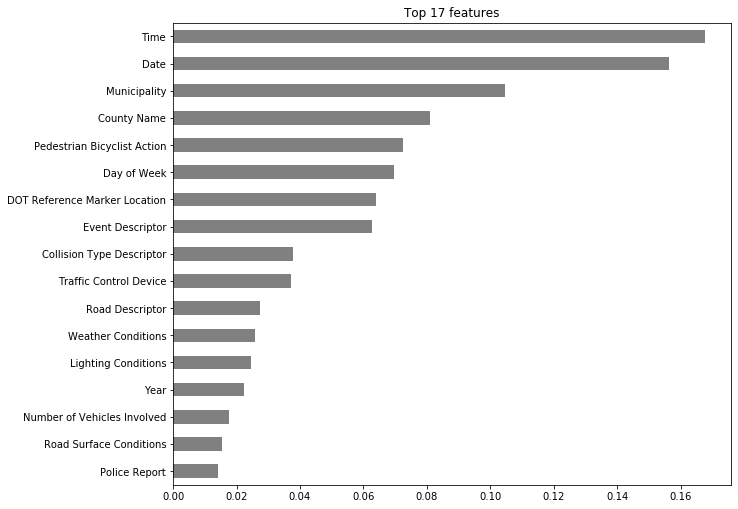

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get the feature importances
rf = pipeRF.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot the feature importances
n = len(X_train.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
#use eli5 for PermutationImportance 
!pip install eli5

import eli5
from eli5.sklearn import PermutationImportance 
plt.rcParams['figure.dpi'] = 100
permuter = PermutationImportance(
    model,
    scoring = 'accuracy',
    n_iter = 5,
    random_state=42
)
permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [0]:
plt.rcParams['figure.dpi'] = 100
feature_names = X_test.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, #show permutation imprtances for all features
    feature_names=feature_names
)

Weight,Feature
0.0366 ± 0.0007,Pedestrian Bicyclist Action
0.0291 ± 0.0004,County Name
0.0290 ± 0.0008,Municipality
0.0156 ± 0.0001,Police Report
0.0115 ± 0.0006,Event Descriptor
0.0091 ± 0.0009,DOT Reference Marker Location
0.0080 ± 0.0006,Number of Vehicles Involved
0.0075 ± 0.0004,Collision Type Descriptor
0.0075 ± 0.0007,Traffic Control Device
0.0031 ± 0.0003,Road Descriptor


In [0]:
!pip install pdpbox

In [0]:
%%time 

plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot


target = 'Crash Descriptor'
features = train.drop(columns=target).columns.tolist()

X = df[features]
y = df[target]

# Use Ordinal Encoder, outside of a pipeline

encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

Wall time: 1min 43s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Wall time: 2min 57s


(<Figure size 1080x1080 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x226800bd988>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x226800a9a48>,
   <matplotlib.axes._subplots.AxesSubplot at 0x226844cec08>]})

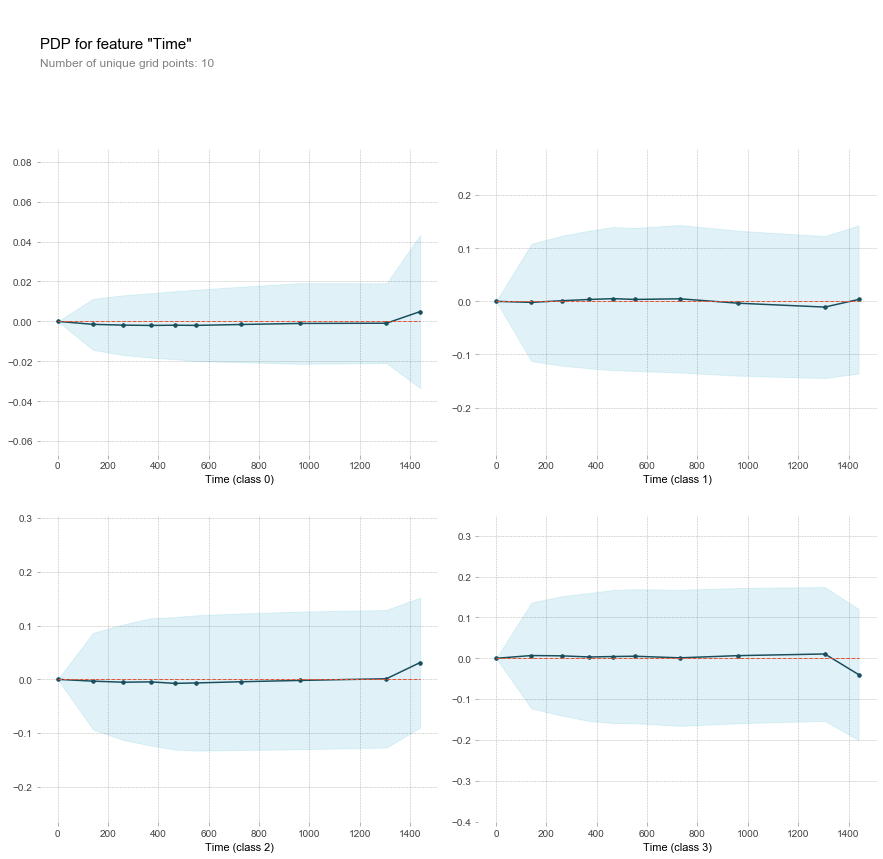

In [0]:
%%time 

%matplotlib inline

feature = 'Time'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

Wall time: 6min 19s


(<Figure size 1080x1224 with 9 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x226836b5448>,
  'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x22683687148>,
   <matplotlib.axes._subplots.AxesSubplot at 0x226834e1348>]})

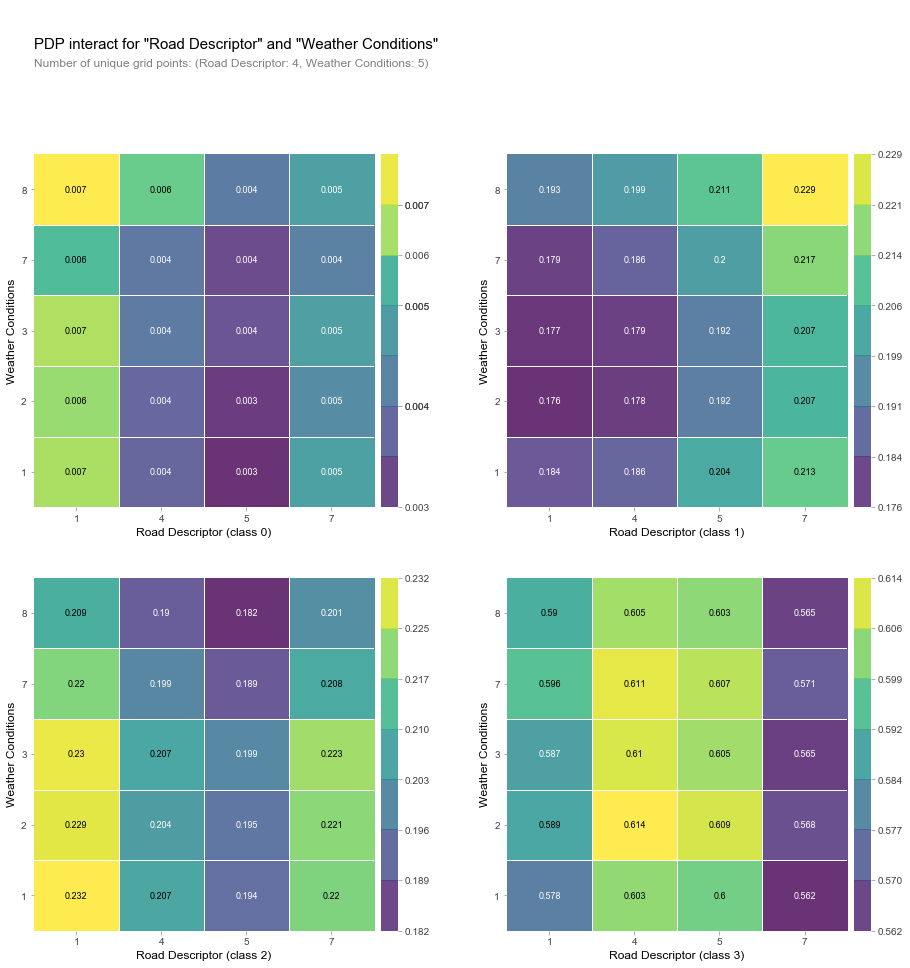

In [0]:

%%time 

from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['Road Descriptor', 'Weather Conditions']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

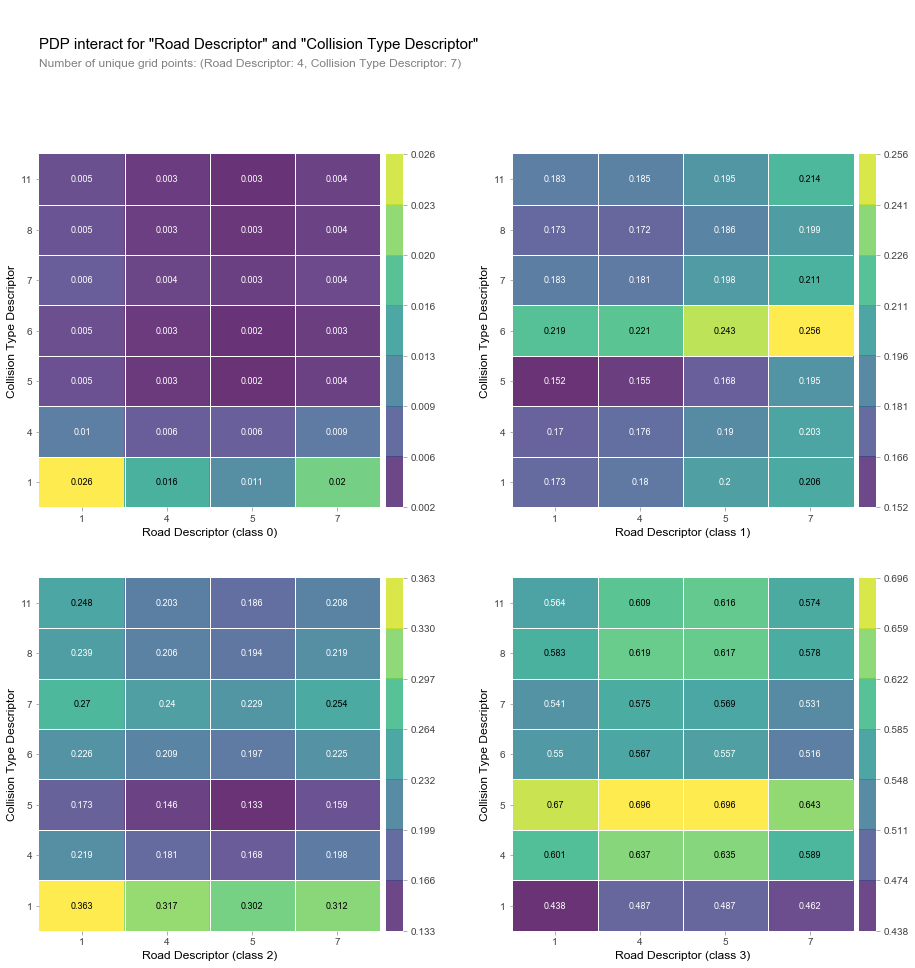

In [0]:
features = ['Road Descriptor', 'Collision Type Descriptor']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
#predicting a row to test
randomrow = X_test.sample(n=1, random_state=0)[X_cols]
pipeRF.predict(randomrow)

array(['Property Damage Accident'], dtype=object)

In [0]:
#what it actually is
randomrow

,Year,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
129943,2016,6:49,6/6/2016,Monday,Y,Daylight,DEERFIELD,OTHER,ONEIDA,Straight and Grade,Clear,None,Dry,8 26073254,Not Applicable,Deer,1


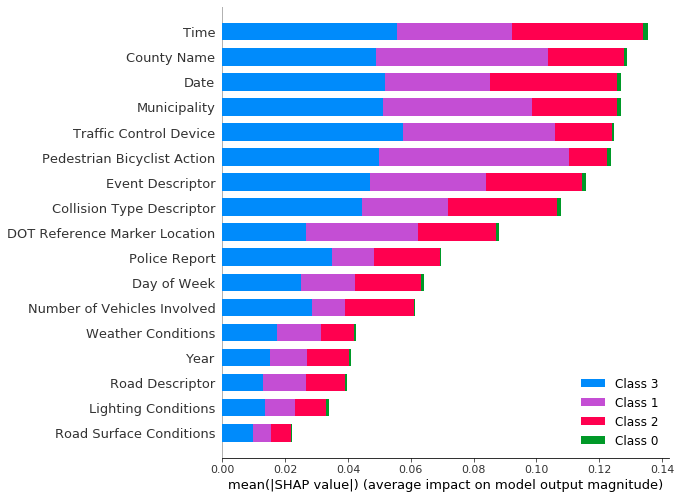

In [0]:
#shapy chart for feature importances 
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_transformed,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [0]:
shap.initjs()
explainer = shap.TreeExplainer(model)
row_processed = transformers.transform(row)
shap_values = explainer.shap_values(row_processed)
shap.force_plot(explainer.expected_value[0], shap_values[0], randomrow, link='logit')